# Exact solution used in MES runs


We would like to MES the implementation of the sheath boundary condition in $u_{e,\|}$. We have that

$$
u_{e,\|} = c_s \exp(\Lambda - [\phi_0 + \phi])
$$

Which normalized yields

$$
u_{e,\|} = \exp(\Lambda - [\phi_0 + \phi])
$$

In [1]:
%matplotlib notebook

from sympy import init_printing
from sympy import S
from sympy import sin, cos, tanh, exp, pi, sqrt, log

from boutdata.mms import x, y, z, t
from boutdata.mms import DDX

import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../../')
# Sys path is a list of system paths
sys.path.append(common_dir)
from CELMAPy.MES import make_plot, BOUT_print

init_printing()

## Initialize

In [2]:
folder = '../gaussianWSinAndParabola/'

## Define the variables

In [3]:
# Initialization
the_vars = {}

In [4]:
# We need Lx
from boututils.options import BOUTOptions
myOpts = BOUTOptions(folder)
Lx = eval(myOpts.geom['Lx'])
Ly = eval(myOpts.geom['Ly'])
mu = eval(myOpts.cst['mu']) # Needed for Lambda
Lambda = eval(myOpts.cst['Lambda'])
phiRef = eval(myOpts.cst['phiRef'])

In [5]:
# No y variation in the profile

# The potential

# The skew sinus
# In cartesian coordinates we would like a sinus with with a wave-vector in the direction
# 45 degrees with respect to the first quadrant. This can be achieved with a wave vector
# k = [1/sqrt(2), 1/sqrt(2)]
# sin((1/sqrt(2))*(x + y))
# We would like 2 nodes, so we may write
# sin((1/sqrt(2))*(x + y)*(2*pi/(2*Lx)))

the_vars['phi'] = sin((1/sqrt(2))*(x + y)*(2*pi/(2*Lx)))

# The profile
the_vars['profile'] = sin(2*pi*x/Lx)**2

# The parallel velocity, given by the sheath boundary condition
the_vars['uEPar'] = exp(Lambda-(phiRef+the_vars['phi']))*the_vars['profile']

## Plot

<IPython.core.display.Javascript object>


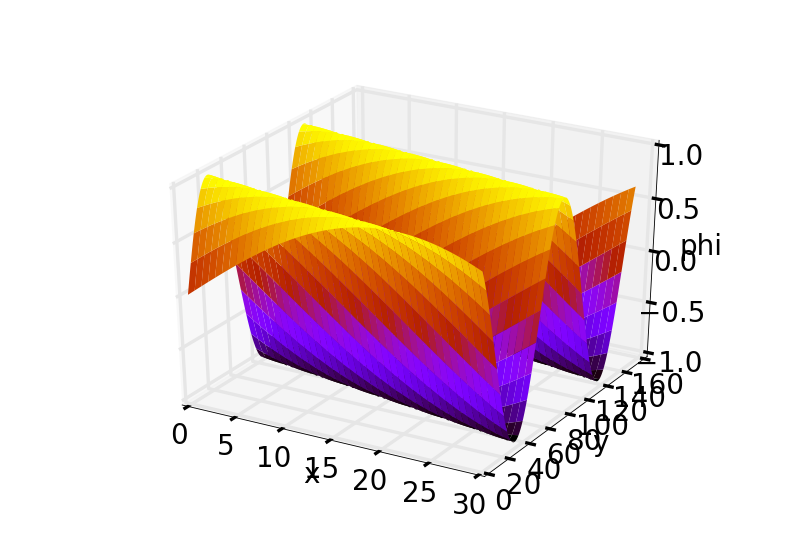

<IPython.core.display.Javascript object>


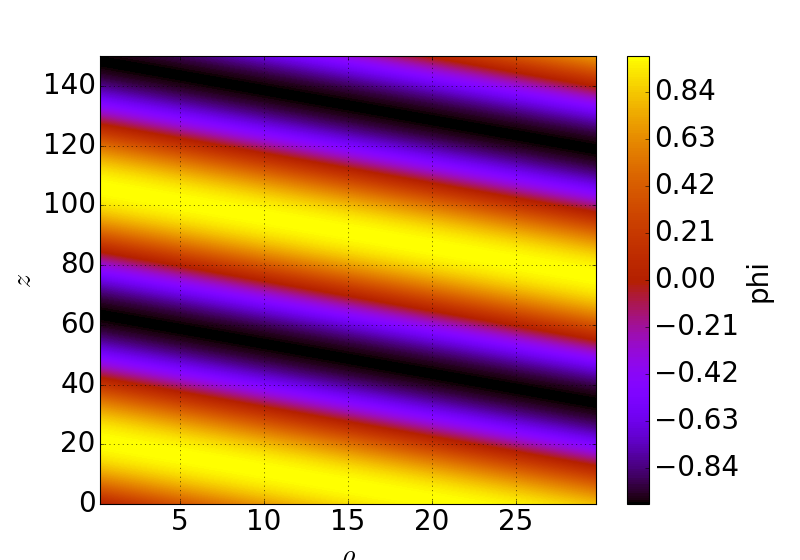

<IPython.core.display.Javascript object>


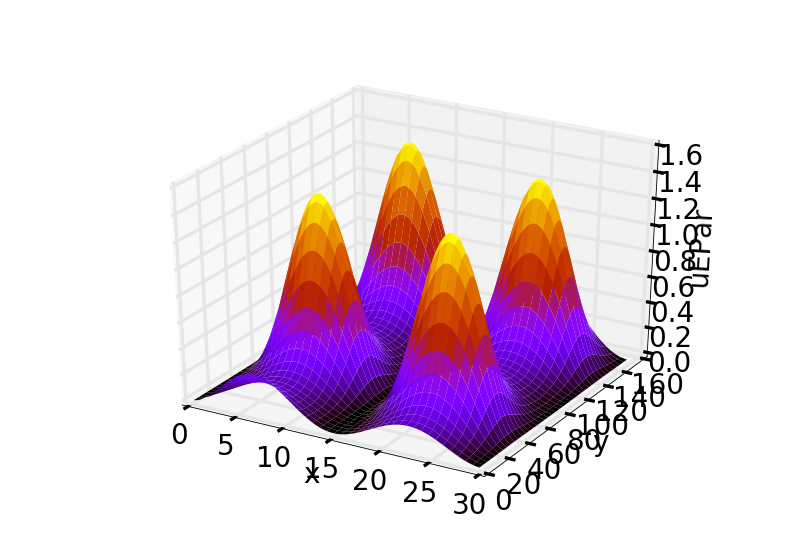

<IPython.core.display.Javascript object>


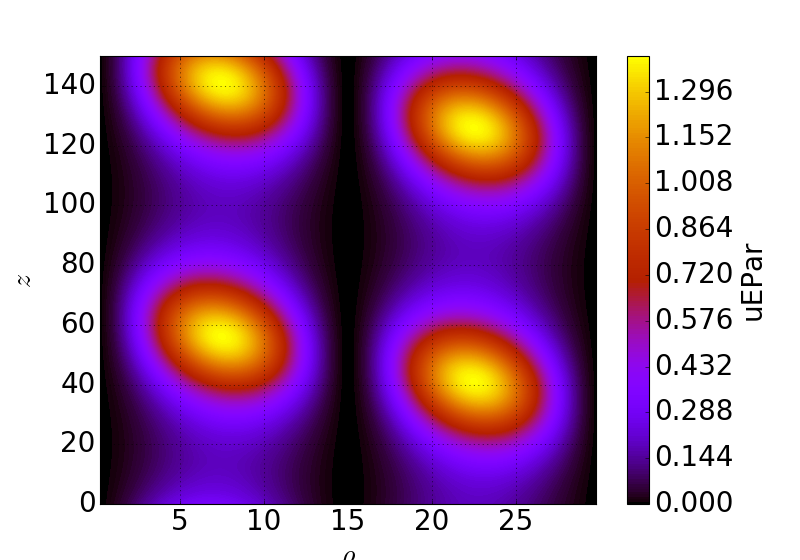

<IPython.core.display.Javascript object>


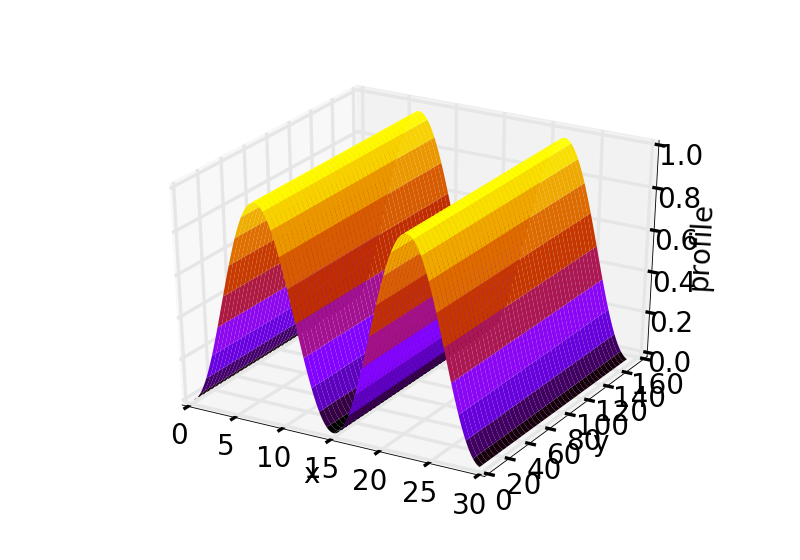

<IPython.core.display.Javascript object>


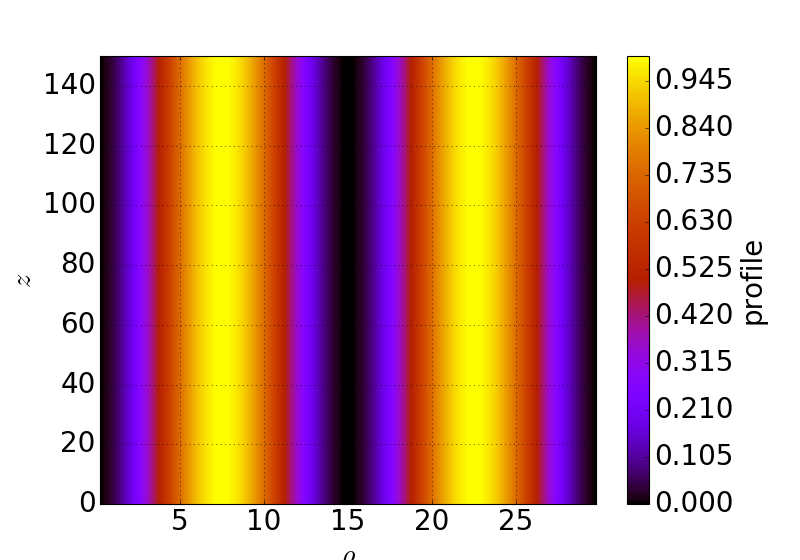

In [6]:
make_plot(folder=folder, the_vars=the_vars, plot2d=True, include_aux=False, direction='y')

## Print the variables in BOUT++ format

In [7]:
BOUT_print(the_vars, rational=False)


[phi]
sin(sqrt(2)*pi*(geom:xl + y)/60)

[uEPar]
0.915025564196348*exp(-sin(sqrt(2)*pi*(geom:xl + y)/60))*sin(pi*geom:xl/15)^2/sqrt(pi)

[profile]
sin(pi*geom:xl/15)^2
